In [ ]:
#importar librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

X = X.astype('float32') / 255.0
X = X.reshape(-1, 28*28)
y = to_categorical(y, num_classes=10)

X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28)

y_test = to_categorical(y_test, num_classes=10)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forma de X: (60000, 784)
Forma de y: (60000, 10)
Forma de X_test: (10000, 784)
Forma de y_test: (10000, 10)


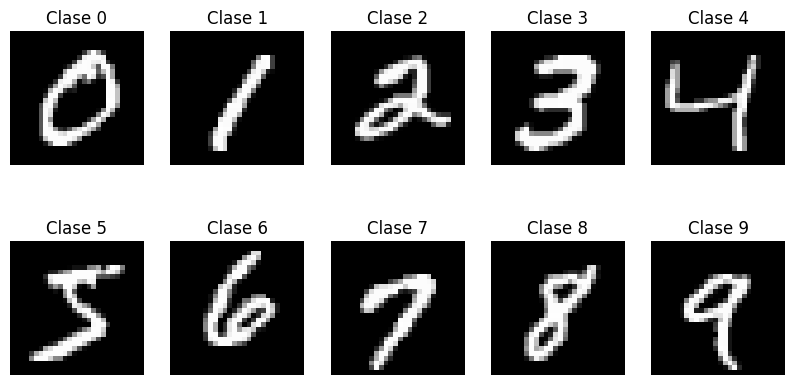

In [ ]:
# Muestra una imagen de cada categoría
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(X[y.argmax(axis=1) == i][0].reshape(28, 28), cmap='gray')
    ax.set_title(f'Clase {i}')
    ax.axis('off')

In [ ]:
def create_mlp(input_dim, num_classes):
    model = Sequential()

    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model
model = create_mlp(input_dim=28*28, num_classes=10)
model.summary()
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8726 - loss: 0.4485 - val_accuracy: 0.9626 - val_loss: 0.1313
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9653 - loss: 0.1163 - val_accuracy: 0.9654 - val_loss: 0.1151
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9748 - loss: 0.0775 - val_accuracy: 0.9700 - val_loss: 0.1044
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9821 - loss: 0.0557 - val_accuracy: 0.9702 - val_loss: 0.1052
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9852 - loss: 0.0470 - val_accuracy: 0.9731 - val_loss: 0.1008
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9890 - loss: 0.0325 - val_accuracy: 0.9708 - val_loss: 0.1088
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9894 - loss: 0.0313 - val_accuracy: 0.9743 - val_loss: 0.1035
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9923 - loss: 0.02

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

